100%|██████████| 9.91M/9.91M [00:00<00:00, 57.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.76MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.52MB/s]


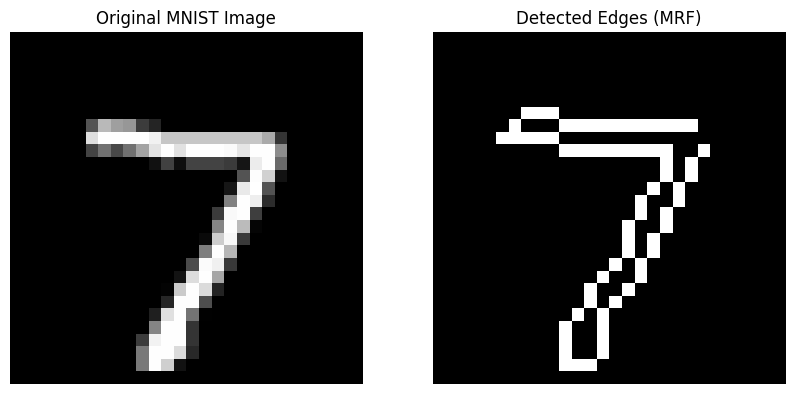

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import networkx as nx

# Step 1: Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
image, _ = mnist_data[0]  # Taking the first image
image = image.squeeze().numpy()  # Convert to NumPy

# Step 2: Define MRF Grid Graph
height, width = image.shape
G = nx.grid_2d_graph(height, width)

# Step 3: Define MRF Energy Function (Smoothness + Edge Term)
def mrf_energy(image, beta=2.0, threshold=0.5):
    """
    Compute MRF energy for edge detection.
    - beta: Controls smoothness
    - threshold: Edge threshold based on intensity difference
    """
    edges = []
    for (x1, y1), (x2, y2) in G.edges():
        pixel_diff = abs(image[x1, y1] - image[x2, y2])
        if pixel_diff > threshold:  # Strong edge detected
            edges.append(((x1, y1), (x2, y2)))

    return edges

# Step 4: Apply MRF-based Edge Detection
edges = mrf_energy(image)

# Step 5: Visualize Original Image and Edges
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original MNIST Image")
plt.axis("off")

# Detected Edges
plt.subplot(1, 2, 2)
edge_image = np.zeros_like(image)
for (x1, y1), (x2, y2) in edges:
    edge_image[x1, y1] = 1  # Mark edges

plt.imshow(edge_image, cmap='gray')
plt.title("Detected Edges (MRF)")
plt.axis("off")

plt.show()
